In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('lastfm-dataset-1K/userid-timestamp-artid-artname-traid-traname.tsv', error_bad_lines=False, warn_bad_lines=True, sep='\t', names=['user', 'timestamp', 'artist-id', 'artist', 'song-id', 'song'])
df_profile = pd.read_csv('lastfm-dataset-1K/userid-profile.tsv', sep='\t', error_bad_lines=False, warn_bad_lines=True, skiprows=1, names=['user', 'gender', 'age', 'country', 'signup'])

In [3]:
df.head()

,user,timestamp,artist-id,artist,song-id,song
0,user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007
1,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15)
2,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15)
3,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15)
4,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15)


In [4]:
df_profile.head()

,user,gender,age,country,signup
0,user_000001,m,NaN,Japan,"Aug 13, 2006"
1,user_000002,f,NaN,Peru,"Feb 24, 2006"
2,user_000003,m,22.0,United States,"Oct 30, 2005"
3,user_000004,f,NaN,NaN,"Apr 26, 2006"
4,user_000005,m,NaN,Bulgaria,"Jun 29, 2006"


In [5]:
# Check if the same user has the same song entered multiple times
df[['user', 'song']].groupby('user').agg({'count', 'nunique'})

song       
            nunique  count
user                      
user_000001    3092  16685
user_000002    8129  57438
user_000003    4565  19494
user_000004    5974  18411
user_000005    1974  20341
...             ...    ...
user_000996     432   4940
user_000997     810   9506
user_000998    5741  34149
user_000999    2547  31415
user_001000    5095  18373

[992 rows x 2 columns]

In [6]:
# Display songs of user_1
user_1 = df.loc[df['user'] == 'user_000001', 'song']
user_1.value_counts()

Music                               70
Gum                                 63
Mario Basanov & Vidis ‘Test’        52
Child Song                          45
Hibari                              42
                                    ..
Memento Mori                         1
This Is Noraneko                     1
Blue Minor                           1
What Else Is There? (Radio Edit)     1
The Hole                             1
Name: song, Length: 3092, dtype: int64

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [8]:
df.describe(include='all')

/home/nabegh/Anaconda3/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,user,timestamp,artist-id,artist,song-id,song
count,19098862,19098862,18498009,19098862,16936136,19098850
unique,992,17454739,107295,173923,960402,1083480
top,user_000949,2009-02-26 21:29:15+00:00,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,db16d0b3-b8ce-4aa8-a11a-e4d53cc7f8a6,Intro
freq,183103,248,115099,115099,3991,17561
first,NaN,2005-02-14 00:00:07+00:00,NaN,NaN,NaN,NaN
last,NaN,2013-09-29 18:32:04+00:00,NaN,NaN,NaN,NaN


### <font color="red"> Note </font>

We have some missing data especially in the id columns that we have to investigate.

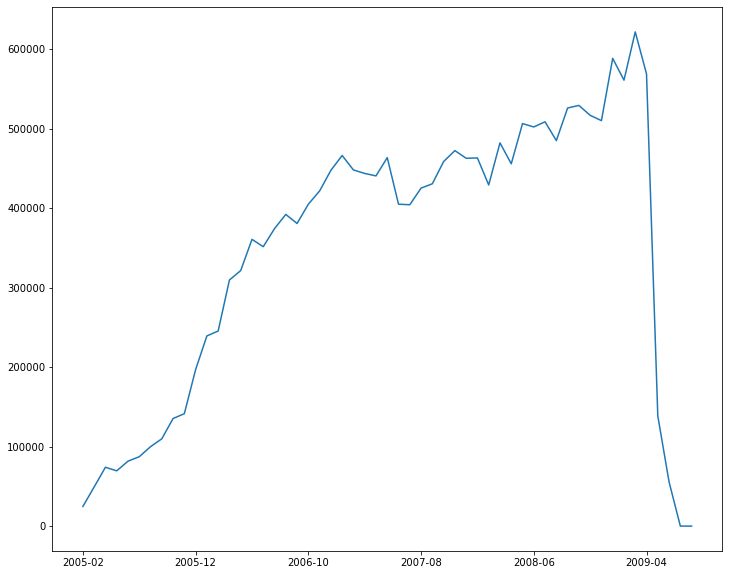

In [9]:
plt.figure(figsize=(12,10))
df['timestamp'].dt.strftime('%Y-%m').value_counts(sort=False).sort_index().plot()
plt.show()

In [10]:
# Check if some songs share a common ID
grouped = df[['song-id', 'song']].groupby(['song-id']).nunique()
grouped[grouped['song'] > 3].head()

,song
song-id,
283faa4b-4138-43b0-9bbd-d5caa2caeaa2,8
4517e130-602c-4c63-b34f-cd6679eb0c46,9
b9a47440-c0c4-495d-a2d5-433c3fff63aa,8


In [11]:
df.loc[df['song-id'] == '283faa4b-4138-43b0-9bbd-d5caa2caeaa2', 'song']

2967164     Open Quotes\nuser_000149\t2008-12-18T22:32:07Z...
2967204     Open Quotes\nuser_000149\t2008-12-18T20:25:32Z...
3004684     Open Quotes\nuser_000149\t2008-06-01T23:38:32Z...
3007671     Open Quotes\nuser_000149\t2008-05-14T02:57:09Z...
3008807     Open Quotes\nuser_000149\t2007-02-28T10:33:20Z...
3015157     Open Quotes\nuser_000149\t2006-08-05T19:38:27Z...
3017068     Open Quotes\nuser_000149\t2006-06-07T10:45:49Z...
12657141    Open Quotes\nuser_000684\t2009-01-31T10:38:23Z...
Name: song, dtype: object

In [12]:
df.loc[df['song-id'] == '4517e130-602c-4c63-b34f-cd6679eb0c46', 'song']

1942654     Unquiet Slumbers For The Sleepers...\nuser_000...
1972760     Unquiet Slumbers For The Sleepers...\nuser_000...
6611481     Unquiet Slumbers For The Sleepers...\nuser_000...
11424559    Unquiet Slumbers For The Sleepers...\nuser_000...
12902538    Unquiet Slumbers For The Sleepers...\nuser_000...
12905225    Unquiet Slumbers For The Sleepers...\nuser_000...
12935043    Unquiet Slumbers For The Sleepers...\nuser_000...
12948394    Unquiet Slumbers For The Sleepers...\nuser_000...
13227544    Unquiet Slumbers For The Sleepers...\nuser_000...
Name: song, dtype: object

In [13]:
df.loc[df['song-id'] == 'b9a47440-c0c4-495d-a2d5-433c3fff63aa', 'song']

3714166    Kill 'Em All...\nuser_000188\t2008-12-02T10:58...
3720556    Kill 'Em All...\nuser_000188\t2008-04-13T17:32...
7052003    Kill 'Em All...\nuser_000361\t2007-10-12T02:15...
7052004    Kill 'Em All...\nuser_000361\t2007-10-11T00:16...
7055719    Kill 'Em All...\nuser_000361\t2007-08-09T06:37...
7057113    Kill 'Em All...\nuser_000361\t2007-07-27T03:49...
7058931    Kill 'Em All...\nuser_000361\t2007-06-16T10:22...
7060157    Kill 'Em All...\nuser_000361\t2007-05-26T11:30...
Name: song, dtype: object

### <font color="red"> Note </font>

The song names that share the same id are just unclean example with another user data concatenated to it.

/home/nabegh/Anaconda3/envs/kaggle/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


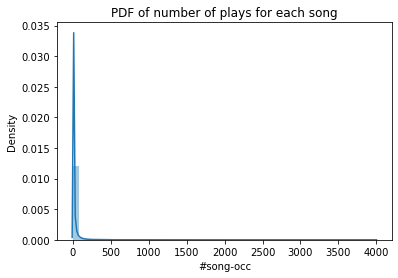

In [14]:
g1 = sns.distplot(df['song-id'].value_counts())
g1.set(xlabel='#song-occ', title='PDF of number of plays for each song')
plt.show()

In [15]:
print("Ratio of songs that only appear once {:.2f}".format((df['song-id'].value_counts() == 1).sum() / 960402))

Ratio of songs that only appear once 0.27


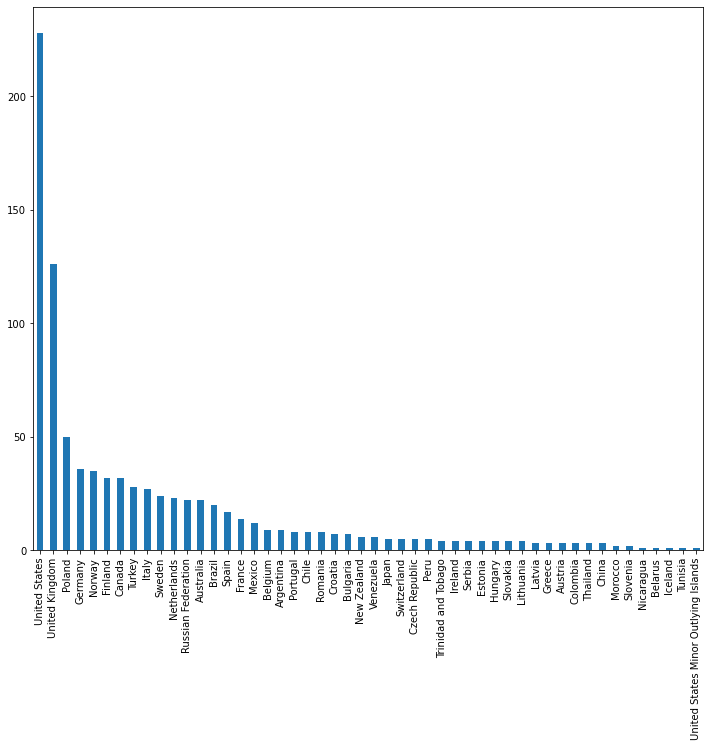

In [16]:
plt.figure(figsize=(12,10))
df_profile['country'].value_counts().head(50).plot(kind='bar')
plt.show()

<AxesSubplot:>

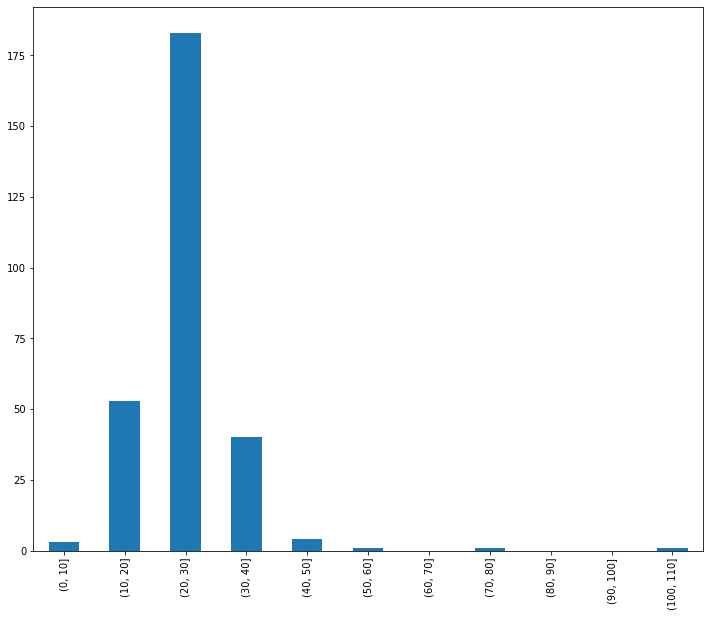

In [17]:
age = df_profile['age'][(df_profile['age'] > 0) & (df_profile['age'] < 120)]
plt.figure(figsize=(12,10))
pd.cut(age, bins=range(0,120,10)).value_counts(sort=False).sort_index().plot(kind='bar')

<AxesSubplot:>

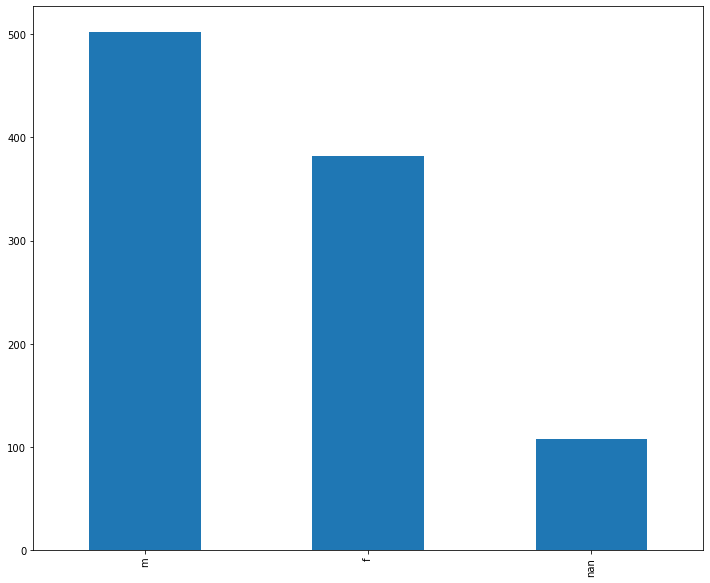

In [18]:
plt.figure(figsize=(12,10))
df_profile['gender'].value_counts(dropna=False).plot(kind='bar')

In [9]:
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials

client_id = '***'
client_secret = '***'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id,
                                                      client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [35]:
def extract_spotify_id(x):
    q = 'artist:{} track:{}'.format(x[3], x[5])
    results = sp.search(q=q, limit=1, type='track')
    track_id = results['tracks']['items']
    if len(track_id)==1:
        return results['tracks']['items'][0]['uri']
    else:
        return None
    
df['spotify_id'] = df.apply(extract_spotify_id, axis=1)

In [51]:
new_features = df['spotify_id'].apply(lambda x: sp.audio_features(x) if x != None else None)

In [52]:
new_features

0                                                    None
1                                                    None
2                                                    None
3                                                    None
4                                                    None
                              ...                        
4995    [{'danceability': 0.688, 'energy': 0.642, 'key...
4996                                                 None
4997    [{'danceability': 0.707, 'energy': 0.987, 'key...
4998    [{'danceability': 0.692, 'energy': 0.989, 'key...
4999    [{'danceability': 0.707, 'energy': 0.987, 'key...
Name: spotify_id, Length: 5000, dtype: object

By using the spotify API, we find interesting features for different songs that could help us to investigate the user behaviour. We have $\frac{2}{5}$ of the data that could not be found in the spotify database. We are confident that by refining the search, we will be able to find a bigger chunk of hits in the spotify database.